In [ ]:
from my_plot_stuff import *

import collections
import json

with open("orda_annotations_0416.json", 'r') as f:
    orda_data = json.load(f)

with open("/Users/nnayak//git_repos/iclr-discourse-dataset/data/review_rebuttal_pair_dataset/traindev_train.json", 'r') as f:
    text_obj = json.load(f)

In [58]:
review_map = {}
acceptable_pairs = []
for dataset_name in "traindev_train traindev_dev traindev_test truetest".split():
    rating_counter = collections.Counter()
    with open("/Users/nnayak//git_repos/iclr-discourse-dataset/data/review_rebuttal_pair_dataset/" + dataset_name +".json", 'r') as f:
        text_obj = json.load(f)
    for pair in text_obj['review_rebuttal_pairs']:
        if dataset_name == "truetest":
            pass
        else:
            acceptable_pairs.append(pair["review_sid"])
        assert pair["review_sid"] not in review_map
        review_map[pair["review_sid"]] = pair["labels"]
        rating_counter[pair["labels"]["rating"]] += 1

In [59]:
review_sentence_annotations = orda_data["reviewsentenceannotation"]
double_labels = []
various_counter = collections.defaultdict(collections.Counter)
rating_label_map = collections.defaultdict(list)
for sent in review_sentence_annotations:
    if sent["fields"]["review_id"] == "example_review":
        continue
    try:
        labels = json.loads(json.loads(sent["fields"]["labels"]))
    except TypeError:
        labels = json.loads(sent["fields"]["labels"])
    
    if not labels:
        various_counter["length"][0] += 1
    elif not labels["1"]:
        various_counter["length"][1] += 1
    else:
        various_counter["length"][2] += 1
        double_labels.append(labels)

    rating = review_map[sent["fields"]["review_id"]]["rating"]
    for index, label in labels.items():
        if not label:
            continue
        else:
            rating_label_map[rating].append(label)
            for key, val in label.items():
                various_counter[key][val] += 1
                if key == 'asp' and 'pol' in label:
                    various_counter[key + label['pol']][val] += 1

In [60]:
rating_counter = collections.defaultdict(collections.Counter)
for
for rating, examples in rating_label_map.items():
    for example in examples:
        if 'pol' in example:
            rating_counter[rating][ example["arg"] + "_" + example['pol']] += 1
            
print(rating_counter)

SyntaxError: invalid syntax (<ipython-input-60-0710e919c3b4>, line 2)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
0
1
2
3
4
5
6
7


Counter({'Evaluative_P-Positive': 50,
         'Evaluative_N-Negative': 29,
         'Request_N-Negative': 20,
         'Request_U-Neutral': 34,
         'Evaluative_U-Neutral': 30})

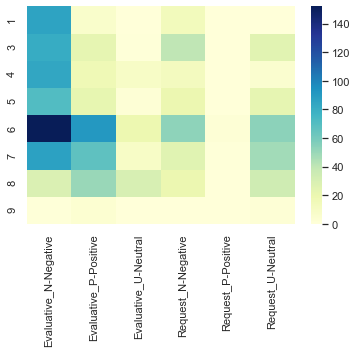

In [48]:
def heatmap_from_double_dict(double_dict):
    outer_labels = list(sorted(double_dict.keys()))
    inner_labels = set()
    for inner_dict in double_dict.values():
        inner_labels.update(inner_dict.keys())
    inner_labels = list(sorted(inner_labels))
    array = np.zeros([len(outer_labels), len(inner_labels)])
    print(array)
    for i, l0 in enumerate(outer_labels):
        print(i)
        for j, l1 in enumerate(inner_labels):
            array[i][j] = double_dict[l0][l1]

    ax = sns.heatmap(array, cmap="YlGnBu", xticklabels=inner_labels, yticklabels=outer_labels)
    
heatmap_from_double_dict(rating_counter)


dict_keys(['length', 'arg', 'struc', 'asp', 'aspP-Positive', 'pol', 'aspN-Negative', 'req', 'aspU-Neutral'])


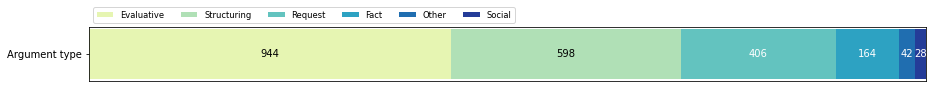

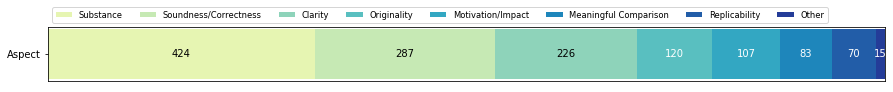

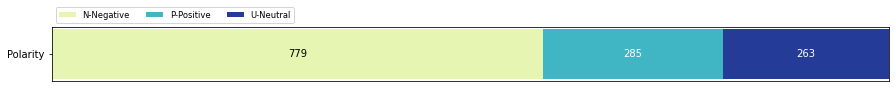

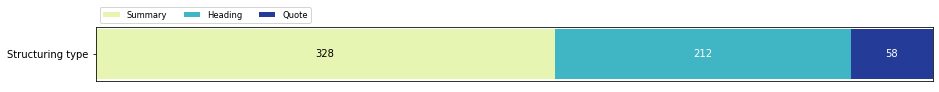

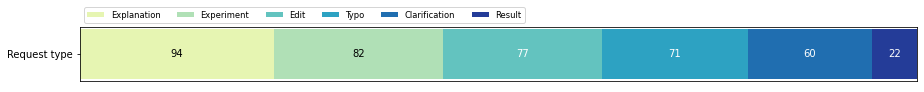

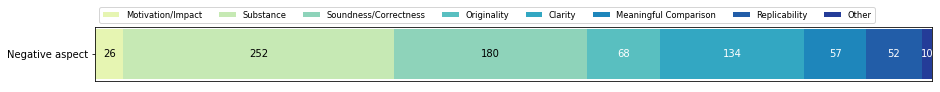

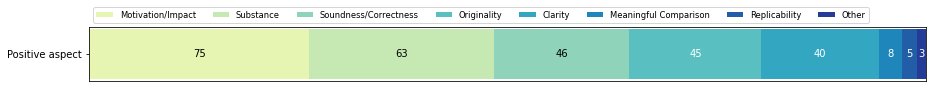

In [3]:
print(various_counter.keys())

real_names = {
"arg": "Argument type",
"asp": "Aspect",
"pol": "Polarity",
"struc": "Structuring type",
"req": "Request type",
"aspN-Negative": "Negative aspect",
"aspP-Positive": "Positive aspect",
}

for k, v in real_names.items():
    if '-' in k:
        make_survey(k, v, various_counter, "Motivation/Impact|Substance|Soundness/Correctness|Originality|Clarity|Meaningful Comparison|Replicability|Other".split("|"))
    else:
        make_survey(k, v, various_counter, None )

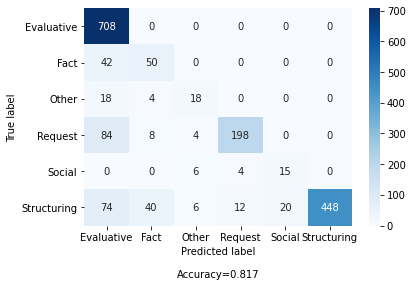

In [4]:
ba = set(
    (x["fields"]["review_id"],x["fields"]["initials"])
    for x in review_sentence_annotations)

import collections
annotator_map = collections.defaultdict(list)
for rid, ann in sorted(ba):
    annotator_map[rid].append(ann)
    
arg_confusions = collections.defaultdict(collections.Counter)

for rid, anns in annotator_map.items():
    if 'example' in rid:
        continue
    if len(anns) < 2:
        continue
    relevant_annotations = [
        i for i in review_sentence_annotations
        if (i["fields"]["review_id"] == rid)]
    annotation_map = collections.defaultdict(list)
    for ann in relevant_annotations:
        annotation_map[ann["fields"]["review_sentence_index"]].append(ann["fields"]["labels"])
    for index, label_jsons in annotation_map.items():
        args = []
        for label_json in label_jsons:
            label = json.loads(json.loads(label_json))
            if label:
                args.append(label["0"]["arg"])
        for arg1 in args:
            for arg2 in args:
                a, b = reversed(sorted([arg1, arg2]))
                arg_confusions[a][b] += 1
    
                               
all_arg_names = sorted(arg_confusions.keys())

arg_names = [x for x in all_arg_names if x.startswith("Evaluative") or x.startswith("Request")]

confusion_wrapper(all_arg_names, arg_confusions)

In [5]:
arg_confusions = collections.defaultdict(collections.Counter)
arg_0_set = set()
arg_1_set = set()
for label in double_labels:
    arg_confusions[label["0"]["arg"]][label["1"]["arg"]] += 1
    arg_0_set.add(label["0"]["arg"])
    arg_1_set.add(label["1"]["arg"])
    
arg_0_labels = list(sorted(arg_0_set))
arg_1_labels = list(sorted(arg_1_set))
array = np.zeros([len(arg_0_labels), len(arg_1_labels)])
for i, arg_0 in enumerate(arg_0_labels):
    for j, arg_1 in enumerate(arg_1_labels):
        array[i][j] = arg_confusions[arg_0][arg_1]
        

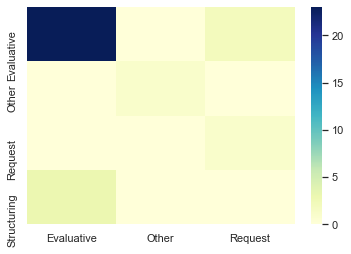

In [6]:
arg_confusions

import numpy as np; np.random.seed(0)

import seaborn as sns; sns.set_theme()

ax = sns.heatmap(array, cmap="YlGnBu", xticklabels=arg_1_labels, yticklabels=arg_0_labels)